In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("../data/cleaned_reviews.tsv", sep="\t")
print(data.head())

   rating  vote  verified   reviewTime    reviewerName  \
0       5     0      True  07 14, 2014           Alvey   
1       3     0      True  06 24, 2014    Jeff A Milne   
2       5     0      True   06 1, 2014   P. R THOMPSON   
3       5     0      True  05 15, 2014  Earle Williams   
4       4     0      True  03 28, 2014             JJM   

                                          reviewText  \
0                             great read every issue   
1  magazine great time technology magazine new st...   
2  ive read maximum pc mpc many year article tech...   
3  order magazine grandson then 7 go 30 wasis dep...   
4  subscribed nook version year thoroughly enjoy ...   

                                        summary  
0                                    Five Stars  
1                         Great While it lasted  
2  For Both the Newbie and The Advanced PC User  
3                                    Great Gift  
4               Decent magazine at a good price  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/frederikvincentprimdahl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


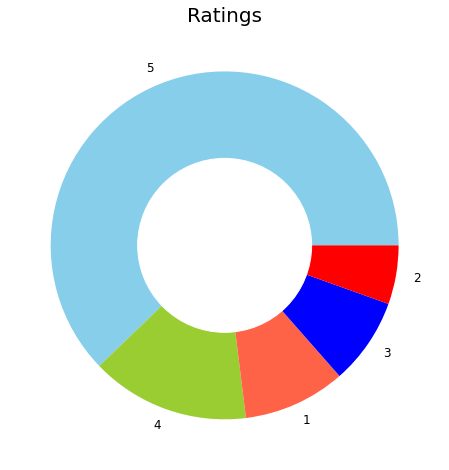

In [38]:
data = data.dropna()

ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Ratings", fontsize=20)
plt.show()

In [39]:
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviewText"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviewText"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviewText"]]
print(data.head())

   rating  vote  verified   reviewTime    reviewerName  \
0       5     0      True  07 14, 2014           Alvey   
1       3     0      True  06 24, 2014    Jeff A Milne   
2       5     0      True   06 1, 2014   P. R THOMPSON   
3       5     0      True  05 15, 2014  Earle Williams   
4       4     0      True  03 28, 2014             JJM   

                                          reviewText  \
0                             great read every issue   
1  magazine great time technology magazine new st...   
2  ive read maximum pc mpc many year article tech...   
3  order magazine grandson then 7 go 30 wasis dep...   
4  subscribed nook version year thoroughly enjoy ...   

                                        summary  Positive  Negative  Neutral  
0                                    Five Stars     0.577     0.000    0.423  
1                         Great While it lasted     0.380     0.076    0.543  
2  For Both the Newbie and The Advanced PC User     0.243     0.081    0.676 

In [40]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
        print(f"Score: {a}")
    elif (b>a) and (b>c):
        print("Negative")
        print(f"Score: {b}")
    else:
        print("Neutral")
        print(f"Score: {c}")
sentiment_score(x, y, z)

Neutral
Score: 3573.3289999999843
